# Import Libraries

In [9]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xg
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load dataset

In [10]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# class distribution
print(dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


# Descriptions

In [6]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Box and Whisker plots

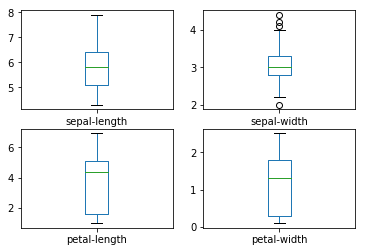

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# Histograms

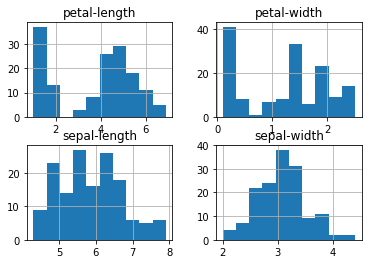

In [7]:
dataset.hist()
plt.show()

# Scatter plot matrix

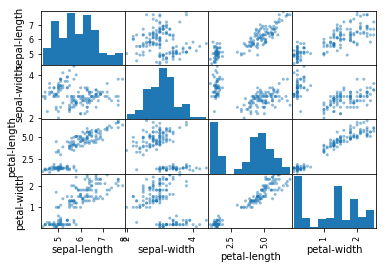

In [8]:
scatter_matrix(dataset)
plt.show()

# Basic Regression using Scatter plot

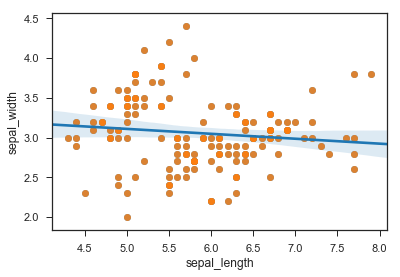

In [48]:
df = sns.load_dataset('iris')
 
# use the function regplot to make a scatterplot
sns.regplot(x=df["sepal_length"], y=df["sepal_width"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df["sepal_length"], y=df["sepal_width"], fit_reg=False)
#sns.plt.show()





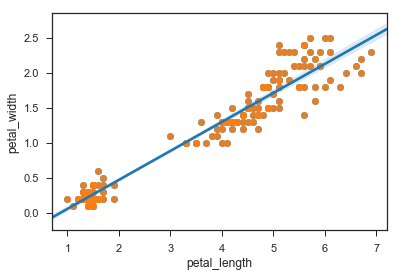

In [47]:

# use the function regplot to make a scatterplot
sns.regplot(x=df["petal_length"], y=df["petal_width"])
#sns.plt.show()
 
# Without regression fit:
sns.regplot(x=df["petal_length"], y=df["petal_width"], fit_reg=False)
#sns.plt.show()

# Split-out validation dataset

In [42]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Create Model Shells (Instantiate them)

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Spot test each model with Cross-Validation

In [44]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
RF: 0.983333 (0.033333)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Graphical comparison of algorithms

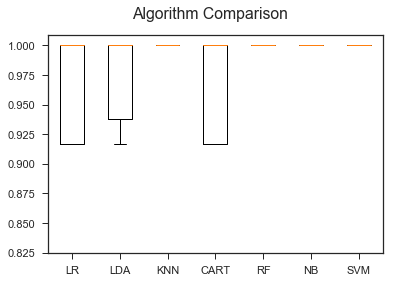

In [45]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Make predictions on validation dataset
K-Nearest Neighbors:

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



# SVM - Support Vector Machine:

In [23]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



# XGBoost

In [25]:
import xgboost as xg
import numpy as np

#Map the Iris Class to numerical values
iris_class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
new_y = [iris_class_map.get(iris_class) for iris_class in Y]

#Split the data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, new_y, test_size=validation_size, random_state=seed)
#DMatrix Data Format)
#DMatrix Data Format
dtrain = xg.DMatrix(X_train, label=y_train)
dtest = xg.DMatrix(X_test, label=y_test)

#Set Parameters
param = {
    'max_depth': 3, 
    'eta': 0.3,  
    'silent': 1,  
    'objective': 'multi:softprob',  
    'num_class': 3}  
num_round = 20  

#Train the model 
bst = xg.train(param, dtrain, num_round)

#Model's prediction
preds = bst.predict(dtest)

#Select the feature with highest probability 
predictions = np.asarray([np.argmax(line) for line in preds])

#Review accuracy of the XGBoost model
print(accuracy_score(y_test, predictions))

0.9


# Feature Importance - Random Forest

petal-width     0.473483
petal-length    0.454630
sepal-length    0.056658
sepal-width     0.015229
dtype: float64


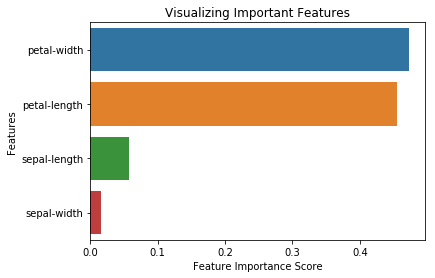

In [27]:


#Random Forest - Feature Importance
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
feature_importance = pandas.Series(rfc.feature_importances_,index=dataset.columns[0:4]).sort_values(ascending=False)
print(feature_importance)

# Creating a bar plot
sns.barplot(x=feature_importance, y=feature_importance.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance Features")
plt.show()